<a href="https://colab.research.google.com/github/Rohit1Chougule/Employee-Attrition-Performance/blob/main/UM_Employee_Attrition_%26_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About Project Objectives:
1. Understand Current Turnover Rates: Gain a comprehensive understanding of the current employee turnover rate and analyze the demographic distribution of attrition by age, gender, education, department, and job role.
2. Identify Key Factors Influencing Turnover: Examine the main factors contributing to employee attrition, including job satisfaction indicators (job
involvement and work-life balance), salary factors (monthly income and salary
hikes), and benefit factors (stock option levels), to uncover patterns and correlations that drive higher attrition rates.

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading dataset
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.shape

(1470, 35)

In [ ]:
#Missing values
df.isnull().sum().value_counts()

,count
0,35


In [ ]:
# Duplicates
df.duplicated().value_counts()

,count
False,1470


## EDA

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Objective 1
Calculate Attrition rates

In [ ]:
attrition_rate = df['Attrition'].value_counts(normalize= True)
print(f"Overall Attrition rates: {attrition_rate} ")

Overall Attrition rates: Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64 


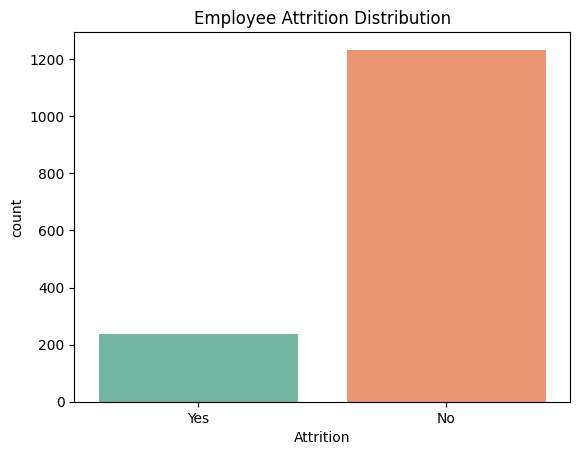

In [ ]:
# Plot attrition rate distribution
sns.countplot(data= df, x= 'Attrition', palette= 'Set2')
plt.title("Employee Attrition Distribution")
plt.show()

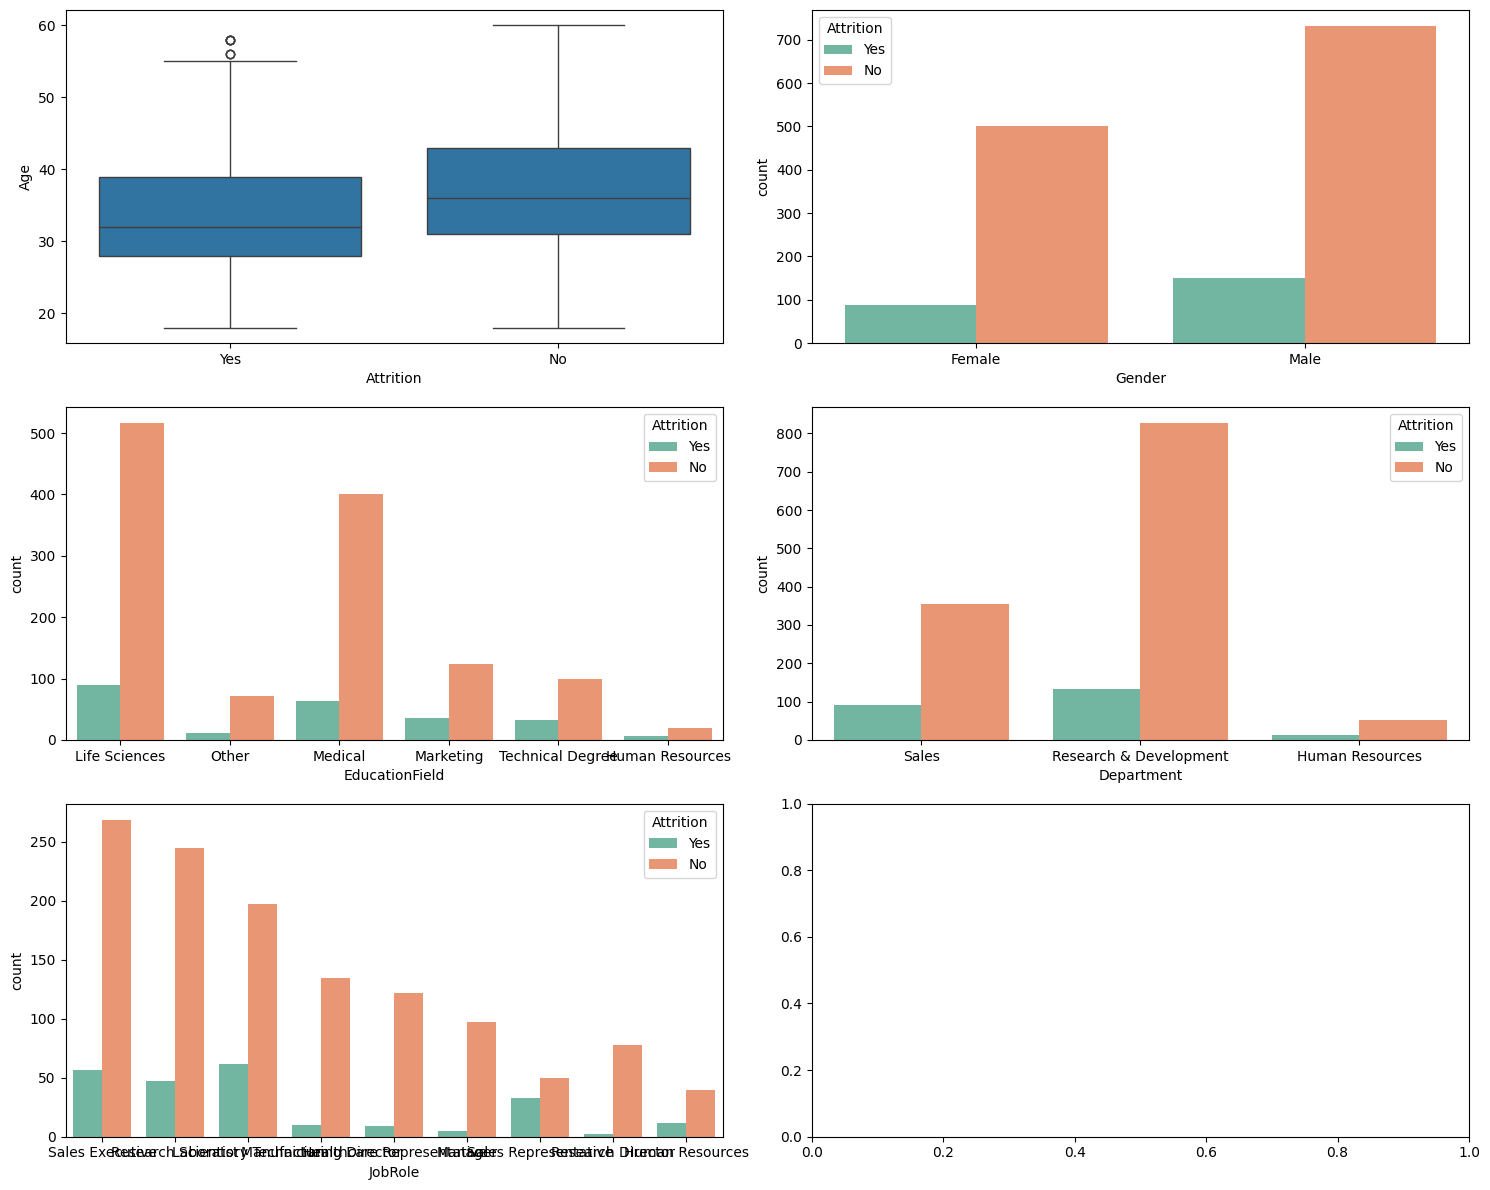

In [ ]:
# Analyze attrition by age, gender, education, department, and job role

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
sns.boxplot(data=df, x='Attrition', y='Age', ax=axes[0, 0])
sns.countplot(data=df, x='Gender', hue='Attrition', palette='Set2', ax=axes[0, 1])
sns.countplot(data=df, x='EducationField', hue='Attrition', palette='Set2', ax=axes[1, 0])
sns.countplot(data=df, x='Department', hue='Attrition', palette='Set2', ax=axes[1, 1])
sns.countplot(data=df, x='JobRole', hue='Attrition', palette='Set2', ax=axes[2, 0])

# Improve layout
plt.tight_layout()
plt.show()

### Objective 2
Identify Key Factors Influencing Turnover

In [ ]:
# Identify numerical correlations with attrition.

# Convert 'Attrition' to numeric
df['Attrition_numeric'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)


In [ ]:
df['Attrition_numeric']

,Attrition_numeric
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


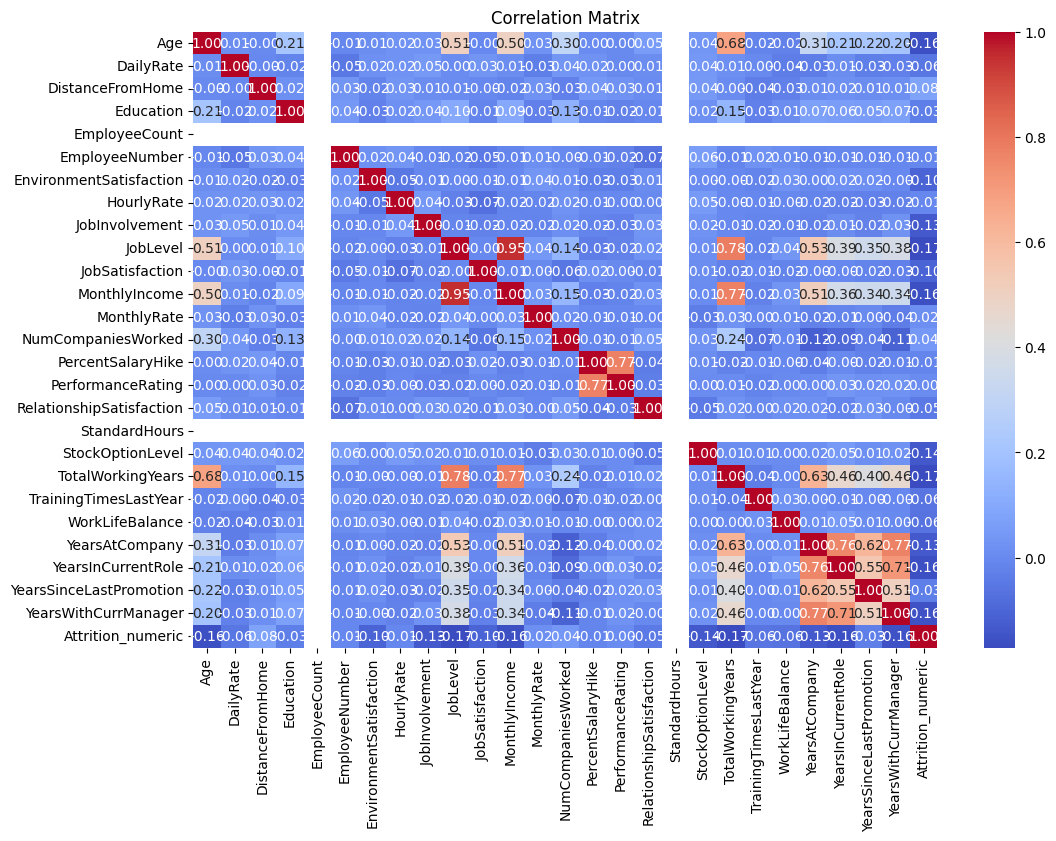

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numeric features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
correlation = numerical_df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

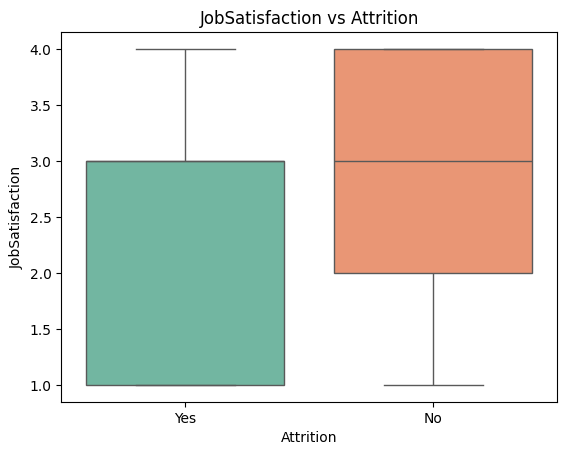

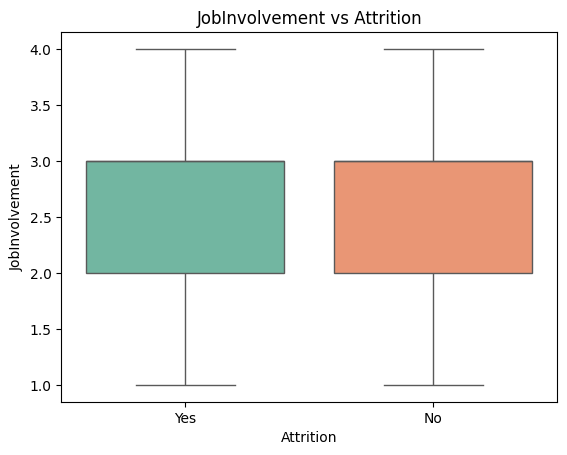

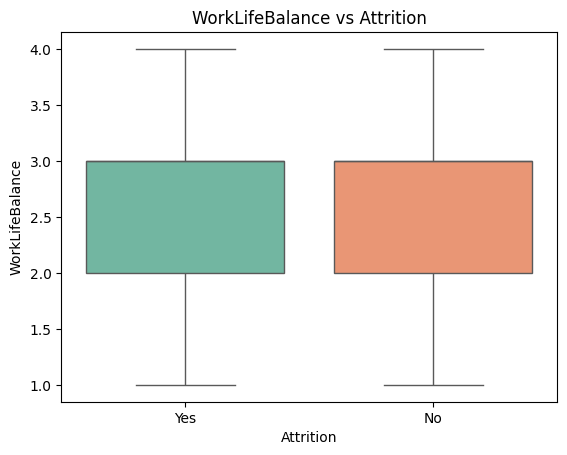

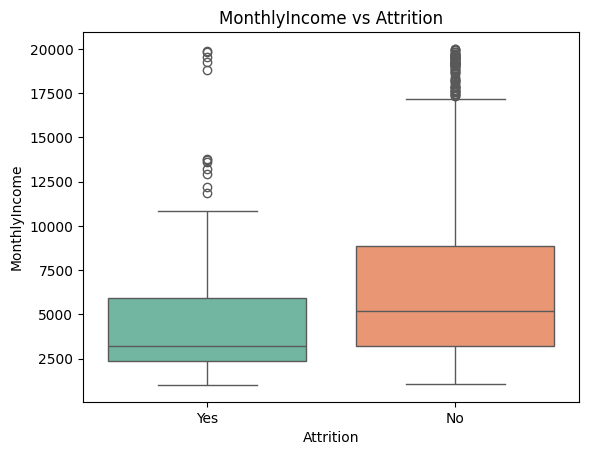

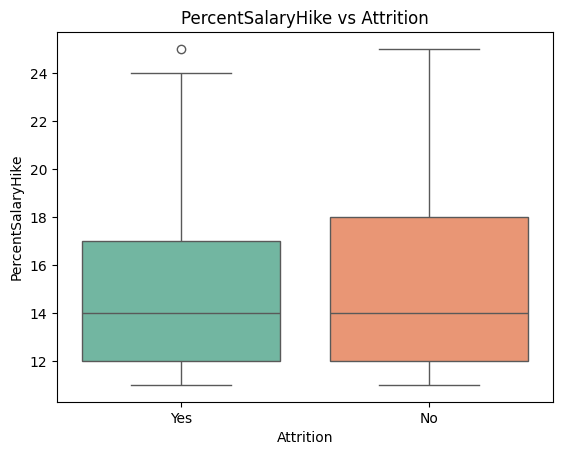

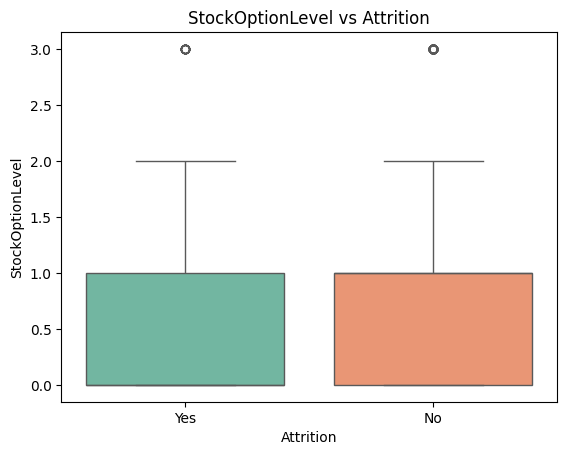

In [ ]:
# Key factors analysis
key_factors = ['JobSatisfaction', 'JobInvolvement', 'WorkLifeBalance','MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel']

for factor in key_factors:
    sns.boxplot(data=df, x='Attrition', y=factor, palette='Set2')
    plt.title(f"{factor} vs Attrition")
    plt.show()

## Model Building

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#encoding categorical variables
categorical_cols =df.select_dtypes(include= 'object').columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}

In [ ]:
for col in categorical_cols:
  df[col]= label_encoders[col].fit_transform(df[col])

In [ ]:
#scaling of numeric varibles
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

numerical_cols = numerical_cols.drop(['Attrition_numeric'])  # Exclude the target variable

scaler = StandardScaler()
df[numerical_cols]= scaler.fit_transform(df[numerical_cols])

In [ ]:
# Split data into train and test sets

X = df.drop(['Attrition', 'Attrition_numeric'], axis = 1)
y = df['Attrition_numeric']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

### Model Training

In [ ]:
# Algorithm Selection:
# We will use Logistic Regression, Random Forest, and Gradient Boosting for comparison.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [ ]:
#LogisticRegression
lr_model = LogisticRegression(random_state = 42)


In [ ]:
# Convert y_train to discrete values if it's continuous
# Assuming y_train contains continuous values and you want to classify based on a threshold
# For example, if values above 0.5 should be class 1 and below 0.5 class 0:
y_train_discrete = (y_train > 0.5).astype(int)

In [ ]:
# Fit the model using the discrete target variable
lr_model.fit(X_train, y_train_discrete)

LogisticRegression(random_state=42)

In [ ]:
# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train_discrete) #y_train_discrete because ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.
rf_pred = rf_model.predict(X_test)

In [ ]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train_discrete)
gb_pred = gb_model.predict(X_test)

### Model Evaluation

In [ ]:
# Convert y_test to discrete values if it's continuous
# Assuming y_test contains continuous values and you want to classify based on a threshold
# For example, if values above 0.5 should be class 1 and below 0.5 class 0:
y_test_discrete = (y_test > 0.5).astype(int)

# Apply the threshold to predictions as well if necessary:
lr_predictions_discrete = (lr_predictions > 0.5).astype(int)
rf_pred_discrete = (rf_pred > 0.5).astype(int)
gb_pred_discrete = (gb_pred > 0.5).astype(int)

models = {'Logistic Regression': lr_predictions_discrete, 'Random Forest': rf_pred_discrete, 'Gradient Boosting': gb_pred_discrete}

for name, pred in models.items():
  print(f"{name} Accuracy : {accuracy_score(y_test_discrete, pred):.2f}")  # Use y_test_discrete
  print(f"{name} ROC AUC : {roc_auc_score(y_test_discrete, pred): .2f}")  # Use y_test_discrete
  print(classification_report(y_test_discrete,pred))  # Use y_test_discrete

Logistic Regression Accuracy : 0.89
Logistic Regression ROC AUC :  0.65
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294

Random Forest Accuracy : 0.87
Random Forest ROC AUC :  0.54
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.69      0.54      0.55       294
weighted avg       0.83      0.87      0.83       294

Gradient Boosting Accuracy : 0.89
Gradient Boosting ROC AUC :  0.65
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       255
           1       0.65      0.33    

### Conclusion:

Accuracy: Measures the proportion of correct predictions overall.

ROC AUC: Indicates the model's ability to distinguish between classes (0 and 1).

Precision, Recall, and F1-Score for Class 1 (Attrition = Yes):

Precision: Out of all predicted positives, how many are correct.

Recall: Out of all actual positives, how many are identified.

F1-Score: Harmonic mean of precision and recall, especially important for imbalanced datasets.

### Objective-wise Recommendation

`Objective 1`: High Overall Accuracy

Logistic Regression and Gradient Boosting both have 0.89 accuracy, outperforming Random Forest.

Gradient Boosting may be preferred as it offers slightly more sophisticated handling of feature interactions.


`Objective 2`: Focusing on Attrition Class (Class 1):

Logistic Regression and Gradient Boosting both achieve better recall (0.33) compared to Random Forest.
Logistic Regression has a slightly better precision (0.68) than Gradient Boosting (0.65), leading to a higher F1-Score (0.45).

# `End of Project`